In [2]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

<>:2: SyntaxWarning: invalid escape sequence '\M'
<>:2: SyntaxWarning: invalid escape sequence '\M'
C:\Users\matra\AppData\Local\Temp\ipykernel_18092\3407629319.py:2: SyntaxWarning: invalid escape sequence '\M'
  'Planicie': 'FFVI\Maps\planicie.jpg'


Text(0.5, 1.0, 'Imagem Original')

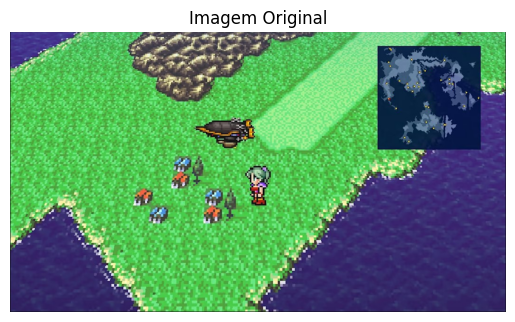

In [3]:
dicionario = {
              'Planicie': 'FFVI\Maps\planicie.jpg'
              }
escolha = 'Planicie' 
original_image = Image.open(dicionario[escolha])
cv2_img = np.array(original_image)
plt.imshow(cv2_img)
plt.axis('off')
plt.title('Imagem Original')

Text(0.5, 1.0, 'Imagem em Escala de Cinza')

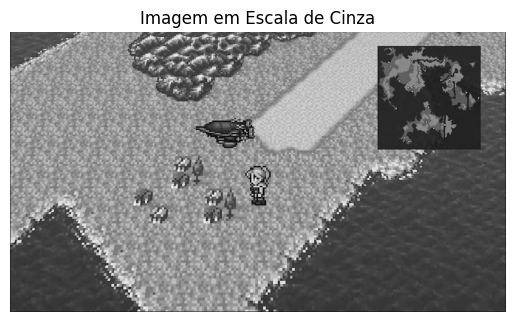

In [18]:
gray = cv2.cvtColor(cv2_img, cv2.COLOR_BGR2GRAY)
plt.figure()
plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.title('Imagem em Escala de Cinza')

Text(0.5, 1.0, 'Imagem Binária')

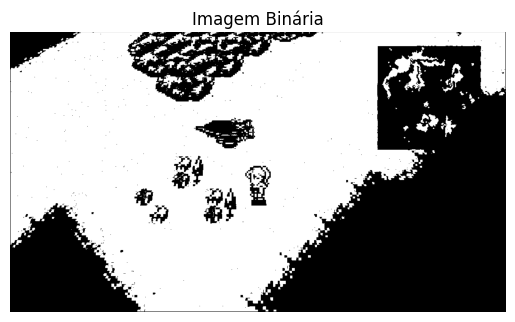

In [36]:
# da imagem em escala de cinza para binária tirar os pixels mais escuros
_, binaria = cv2.threshold(gray, 115, 255, cv2.THRESH_BINARY)
plt.figure()
plt.imshow(binaria, cmap='gray')
plt.axis('off')
plt.title('Imagem Binária')

Text(0.5, 1.0, 'Detecção de Bordas com Sobel')

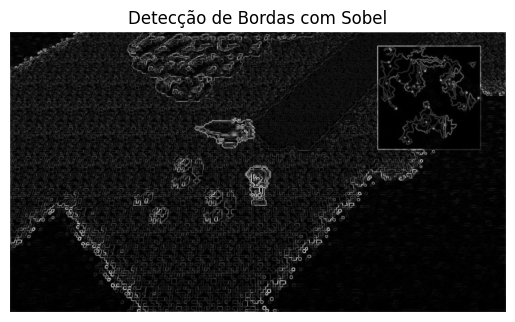

In [45]:
# Aplicar detecção de bordas usando o operador de Sobel
sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
sobel = np.sqrt(sobel_x**2 + sobel_y**2)
plt.figure()
plt.imshow(sobel, cmap='gray')
plt.axis('off')
plt.title('Detecção de Bordas com Sobel')

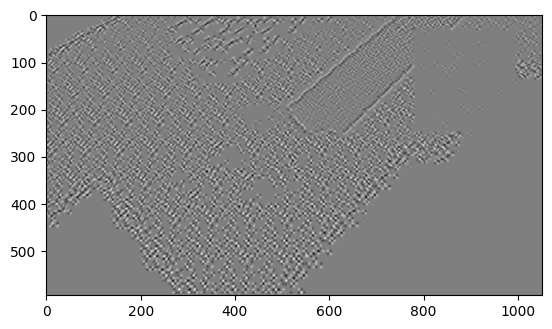

In [38]:
_, thresholded_image = cv2.threshold(gray, 180, 200, cv2.THRESH_BINARY)
edges = cv2.Sobel(thresholded_image, cv2.CV_64F, 1, 1, ksize=15)
edges = cv2.normalize(edges, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
plt.imshow(edges, cmap = 'gray')

True

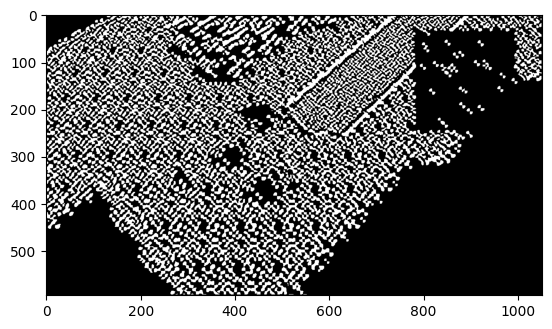

In [39]:
_, binary_image = cv2.threshold(edges, 127, 255, cv2.THRESH_BINARY)
# Exibir a imagem binarizada
plt.imshow(binary_image, cmap='gray')
cv2.imwrite(f'results/{escolha}_edges.jpeg', binary_image)

True

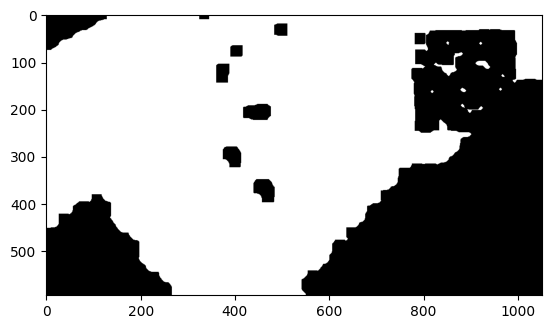

In [41]:
# Definir um kernel para operações de morfologia
kernel = np.ones((10,10), np.uint8)
edges_closed = cv2.Canny(edges, 10, 1)
# Definir um kernel para operações de morfologia
kernel = np.ones((5,5), np.uint8)
smoothed_image = cv2.GaussianBlur(edges_closed, (9, 9), 0)
smoothed_image = cv2.GaussianBlur(smoothed_image, (9, 9), 0)
smoothed_image = cv2.GaussianBlur(smoothed_image, (9, 9), 0)
smoothed_image = cv2.GaussianBlur(smoothed_image, (9, 9), 0)
smoothed_image = cv2.GaussianBlur(smoothed_image, (9, 9), 0)
# Fechar as falhas nos traços
edges_closed = cv2.morphologyEx(smoothed_image, cv2.MORPH_CLOSE, kernel)
# Erodir as linhas para reduzi-las de volta ao tamanho original ou próximo dele
edges_closed = cv2.erode(edges_closed, kernel, iterations=4)

edges_binary = cv2.threshold(edges_closed, 0, 255, cv2.THRESH_BINARY)[1]
plt.imshow(edges_binary, cmap='grey')
cv2.imwrite(f'results/{escolha}_contorno.jpeg', edges_binary)